In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train'
valid_path = 'C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [24]:
  # useful for getting number of classes
folders = glob('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train/*')

In [25]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)

In [26]:
prediction

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

In [27]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [28]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set =train_datagen.flow_from_directory('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 1000 images belonging to 2 classes.


In [33]:
test_set = test_datagen.flow_from_directory('C:\\Users\\new\\Documents\\PythonFiles\\CNN\\dogs-vs-cats\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 2 classes.


In [34]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
32/32 [==============================] - 358s 11s/step - loss: 0.8471 - accuracy: 0.6940 - val_loss: 0.5490 - val_accuracy: 0.7500
Epoch 2/5
32/32 [==============================] - 348s 11s/step - loss: 0.3182 - accuracy: 0.8650 - val_loss: 0.2212 - val_accuracy: 0.9100
Epoch 3/5
32/32 [==============================] - 359s 11s/step - loss: 0.1974 - accuracy: 0.9250 - val_loss: 0.1894 - val_accuracy: 0.9500
Epoch 4/5
32/32 [==============================] - 313s 10s/step - loss: 0.1598 - accuracy: 0.9300 - val_loss: 0.1780 - val_accuracy: 0.9400
Epoch 5/5
32/32 [==============================] - 322s 10s/step - loss: 0.1332 - accuracy: 0.9550 - val_loss: 0.1623 - val_accuracy: 0.9500


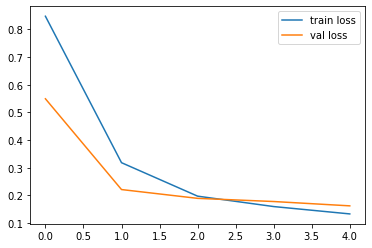

<Figure size 432x288 with 0 Axes>

In [35]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [36]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

KeyError: 'acc'